In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split

In [239]:
df_train = pd.read_csv('train_LoanPrediction.csv')
df_test = pd.read_csv('test_LoanPrediction.csv')

In [240]:
print('Shape of training data: ', df_train.shape)
print('Shape of testing data: ', df_test.shape)

Shape of training data:  (614, 13)
Shape of testing data:  (367, 12)


In [241]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [242]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [243]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [244]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [245]:
print(df_train.columns)
print(df_train.dtypes)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


As we can observe there are a lot of categorical columns which can be encoded. 
Let's go ahead and encode them as per our requirement.

In [246]:
print(df_train.isna().any())
print('')
print(df_test.isna().any())

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool


In [247]:
df = pd.concat([df_train, df_test], ignore_index=True, sort=False)

Now we need to replace all the NaN values in the columns which contain missing values 

In [248]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Married'].fillna('NA',inplace=True)
df['Gender'].fillna('NA',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['Credit_History'].fillna(0,inplace=True)
df['Loan_Status'].fillna('NA',inplace=True)

Text(0.5, 1, 'Correlation Matrix')

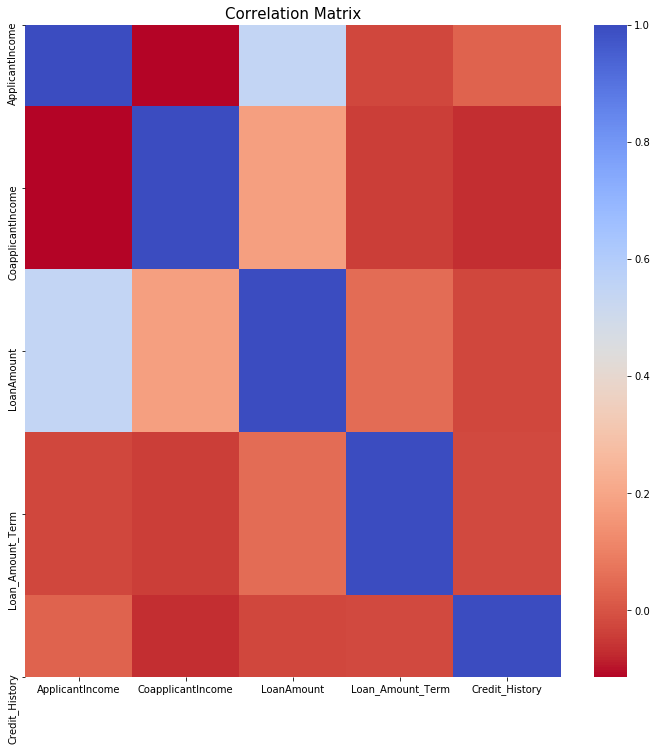

In [249]:
plt.figure(figsize=(12,12))
sns.heatmap(df.iloc[:, 2:].corr(), cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Correlation Matrix", fontsize= 15)

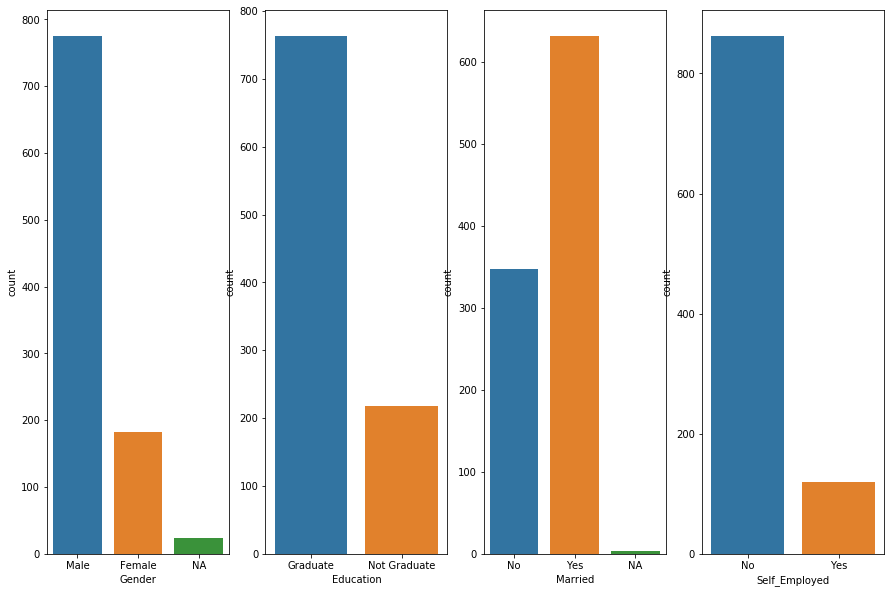

In [250]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 10)) 

sns.countplot('Gender', data=df, ax=ax1)

sns.countplot('Education', data=df, ax=ax2)

sns.countplot('Married', data=df, ax=ax3)

sns.countplot('Self_Employed', data=df, ax=ax4)

plt.show()

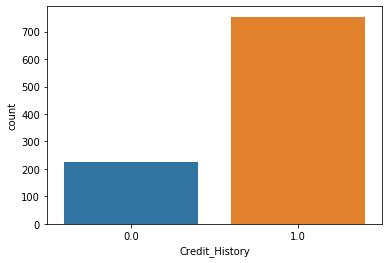

In [251]:
sns.countplot('Credit_History', data=df)

In [252]:
df_test.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'], dtype=object)

Text(0.5, 1.0, 'Training set')

<Figure size 720x720 with 0 Axes>

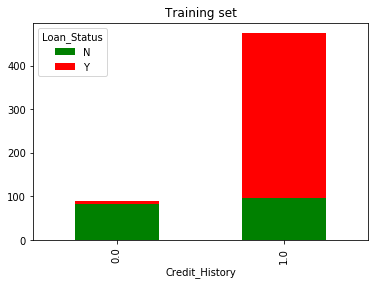

In [253]:
plt.figure(figsize=(10,10))
temp_df = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'])
temp_df.plot(kind='bar', stacked=True, color=['green','red'], grid=False)
plt.title('Training set')

In [254]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(), inplace=True)
df_train['Self_Employed'].fillna('No',inplace=True)
df_train['Married'].fillna('NA',inplace=True)
df_train['Gender'].fillna('NA',inplace=True)
df_train['Dependents'].fillna('0',inplace=True)
df_train['Credit_History'].fillna(0,inplace=True)
df_train['Loan_Status'].fillna('NA',inplace=True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean(), inplace=True)
df_test['Self_Employed'].fillna('No',inplace=True)
df_test['Married'].fillna('NA',inplace=True)
df_test['Gender'].fillna('NA',inplace=True)
df_test['Dependents'].fillna('0',inplace=True)
df_test['Credit_History'].fillna(0,inplace=True)

In [255]:
feature_list = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for i in feature_list:
    df_train[i] = le.fit_transform(df_train[i])

feature_list_test = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
for i in feature_list_test:
    df_test[i] = le.fit_transform(df_test[i])

Checking for outliers using Box plot 

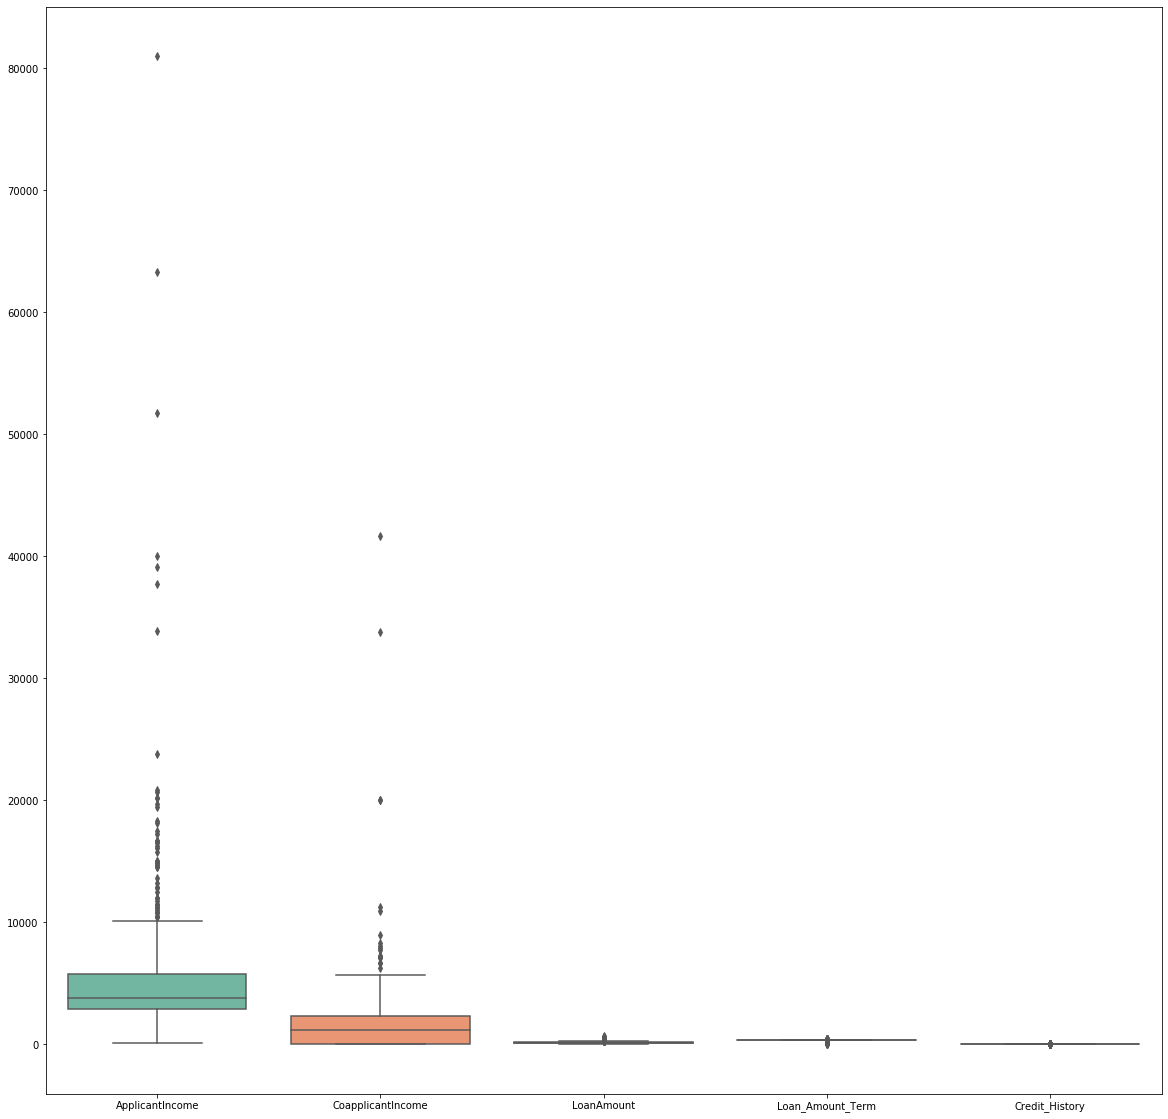

In [256]:
temp = df_train.iloc[:,2:].select_dtypes(include=['int64','float64'])
columns = list(temp.columns.values)
plt.figure(figsize=(20,20))
#trainingDataset[trainingDataset.columns.values].plot.box();
sns.boxplot(data=df_train[columns], palette="Set2")

ApplicantIncome and coapplicantIncome have outliers, but because the size of our dataset is not huge, let us apply our classification algorithm to check results first with outliers in data with 2 fields.

In [257]:
X = df_train.iloc[:, 1:12]
y = df_train.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
n_inputs = X_train.shape[1]

model = Sequential([
    Dense(n_inputs, input_shape= (n_inputs, ), activation= 'relu'),
    Dense(64, activation= 'relu'),
    Dense(32, activation= 'relu'),
    Dense(2, activation= 'softmax')
])

In [259]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 3,046
Trainable params: 3,046
Non-trainable params: 0
_________________________________________________________________


In [260]:
model.compile(Adam(lr= 0.001), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [261]:
model.fit(X_train, y_train, validation_split= 0.2, batch_size=8, epochs= 50, shuffle= True, verbose= 2)

Train on 392 samples, validate on 99 samples
Epoch 1/50
 - 0s - loss: 198.1762 - accuracy: 0.6148 - val_loss: 6.8507 - val_accuracy: 0.4545
Epoch 2/50
 - 0s - loss: 28.7219 - accuracy: 0.6148 - val_loss: 40.0603 - val_accuracy: 0.3030
Epoch 3/50
 - 0s - loss: 25.2458 - accuracy: 0.5281 - val_loss: 29.6387 - val_accuracy: 0.6970
Epoch 4/50
 - 0s - loss: 36.5187 - accuracy: 0.5969 - val_loss: 33.8080 - val_accuracy: 0.7071
Epoch 5/50
 - 0s - loss: 24.7640 - accuracy: 0.5434 - val_loss: 13.5850 - val_accuracy: 0.6970
Epoch 6/50
 - 0s - loss: 15.8480 - accuracy: 0.5842 - val_loss: 20.3108 - val_accuracy: 0.3030
Epoch 7/50
 - 0s - loss: 10.9845 - accuracy: 0.5944 - val_loss: 2.4266 - val_accuracy: 0.5657
Epoch 8/50
 - 0s - loss: 11.5025 - accuracy: 0.5740 - val_loss: 11.6767 - val_accuracy: 0.7071
Epoch 9/50
 - 0s - loss: 9.7761 - accuracy: 0.6276 - val_loss: 12.6439 - val_accuracy: 0.7071
Epoch 10/50
 - 0s - loss: 10.2011 - accuracy: 0.5765 - val_loss: 5.2149 - val_accuracy: 0.4747
Epoch 1

In [262]:
predictions=model.predict(X_test, batch_size=8, verbose=0)

In [268]:
ls_predictions=model.predict_classes(X_test, batch_size=8, verbose=0)

In [269]:
cm=confusion_matrix(y_test, ls_predictions)
print('Predicted confusion Matrix:')
print(cm)

Predicted confusion Matrix:
[[43  0]
 [80  0]]


In [270]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

predictions=rf.predict(X_test)
cm=confusion_matrix(y_test, predictions)
print('Predicted confusion Matrix:')
print(cm)
print('')
print('Classification Report: ')
labels = ['0', '1']
print(classification_report(y_test, predictions, target_names=labels))

Predicted confusion Matrix:
[[19 24]
 [14 66]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.58      0.44      0.50        43
           1       0.73      0.82      0.78        80

    accuracy                           0.69       123
   macro avg       0.65      0.63      0.64       123
weighted avg       0.68      0.69      0.68       123



C:\Users\siddharthsharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
